# 코로나-19 데이터 직접 분석하고 판단하기

### 칼럼 설명
- Country/Region : 국가
- Province/State : 지방/주
- Lat : 위도
- Long : 경도
- 날짜 : 각 날짜의 확진자/사망자 수
<br>

- 데이터 : https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.environ['KAGGLE_USERNAME'] = 'gustn6839'
os.environ['KAGGLE_KEY'] = 

In [5]:
! rm *.*
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
! unzip '*.zip'

  0% 0.00/4.30M [00:00<?, ?B/s]
100% 4.30M/4.30M [00:00<00:00, 67.3MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


In [21]:
df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('RAW_global_deaths.csv')

In [22]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717


In [23]:
df_death.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2438,2442,2443,2443,2444,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489,2495,2496,2497,2508
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1736,1756,1775,1796,1816,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241,2247,2256,2265,2274
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2973,2977,2979,2983,2987,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053,3055,3057,3061,3066,3069,3071,3074,3077,3080,3084,3089,3093,3096,3099,3102,3105,3108
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,110,110,110,110,110,110,112,112,112,112,112,112,112,112,112,112,112,113,113,113,113,113,113,113,113,113,113,114,114,114,115,115,115,115,115,115,116,117,117,117
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,502,504,506,508,508,510,510,511,511,512,514,515,516,516,517,519,520,521,521,522,522,522,524,526,527,530,530,532,532,532,533,533,534,536,537,538,538,540,542,543


# 데이터 구조 변경 및 시각화
- 데이터프레임 구조 Date를 Index로, 지역을 Column으로 변경

In [27]:
df_death = df_death.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
df_death = df_death.transpose()
df_death.index.name = "Date"
df_death.reset_index(inplace=True)
df_death['Date'] = df_death['Date'].apply(lambda s: pd.to_datetime(str(s)))
df_death.set_index('Date', inplace=True)
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,2489,2241,3096,115,538,28,55941,3533,909,9368,3593,188,523,9105,42,2257,23045,317,93,1,12280,6675,591,325284,3,13313,149,3206,6,169,14,851,22998,72,164,23328,4841,63614,146,135,...,5345,22,79,30,9790,4054,0,537,52897,112,75541,571,2063,177,13498,10350,1274,10,90,21,94,0,110,145,8843,31713,553170,335,34885,1499,127006,1009,630,0,1615,35,2645,906,1212,1523
2021-04-02,2495,2247,3099,116,538,28,56023,3552,909,9397,3617,188,527,9155,42,2267,23083,317,93,1,12305,6763,591,328206,3,13438,150,3206,6,171,16,851,23011,72,164,23421,4841,63777,146,135,...,5384,24,79,30,9877,4063,0,537,52946,112,75541,571,2063,177,13498,10351,1288,10,90,21,94,0,110,145,8890,31892,554103,335,35326,1502,127058,1041,630,0,1629,35,2661,916,1215,1524
2021-04-03,2496,2256,3102,117,540,28,56106,3575,909,9434,3648,188,531,9213,43,2276,23130,317,93,1,12316,6763,591,330193,3,13507,150,3206,6,171,19,851,23038,72,164,23524,4841,63932,146,135,...,5422,24,79,30,9948,4068,0,537,52954,112,75698,575,2063,177,13498,10351,1299,10,90,21,95,0,110,145,8931,32078,554779,335,35729,1504,127068,1071,630,0,1647,35,2681,932,1215,1524


In [24]:
def fix_dataframe(df):
  # TODO: 불필요 컬럼 제거, Date를 datetime 객체로 변환, Date를 index로 변경
  df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
  df = df.transpose()
  df.index.name = "Date"
  df.reset_index(inplace=True)
  df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s)))
  df.set_index('Date', inplace=True)
  return df

### 나라별 확진자 수 및 사망자 수 시각화하기

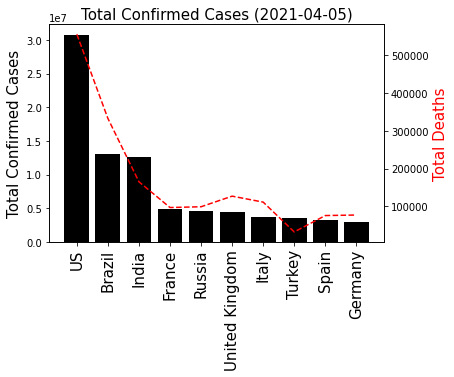

In [37]:
# 최신 일자에 대해 가장 많이 확진된 10개 국가에 대해 시각화
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
sns.barplot(x=top_ten_cases.index, y=top_ten_cases, color='black');
plt.xticks(rotation = 90, size=15)
plt.ylabel('Total Confirmed Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases (%s)' % top_ten_cases.name.strftime('%Y-%m-%d'), size=15)

ax = plt.gca()
ax2 = ax.twinx()
top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]
ax2.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)
plt.show()

### 특정 국가의 확진자 수 및 사망자 수 변화 시각화

In [45]:
# 나라 별 시간에 따른 확진자 수 및 사망자 수 시각화
def plot_case_with_death(country):
  plt.plot(df_case.index, df_case[country])
  plt.ylabel('Confirmed Cases', color='blue')
  plt.title(country + ' Cases & Deaths')
  plt.xlim(right=df_case.index[-1])
  plt.xlabel('Date')
  plt.ylim(0, df_case[country].max() * 1.1)

  ax = plt.gca()
  ax2 = ax.twinx()
  ax2.plot(df_death.index, df_death[country], 'r--')
  ax2.set_ylabel('Deaths', color='red')
  ax2.set_ylim(0, df_death[country].max()*1.3)
  plt.show();
  return

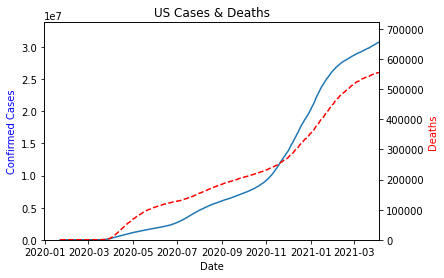

In [44]:
country = 'US'
plt.plot(df_case.index, df_case[country])
plt.ylabel('Confirmed Cases', color='blue')
plt.title(country + ' Cases & Deaths')
plt.xlim(right=df_case.index[-1])
plt.xlabel('Date')
plt.ylim(0, df_case[country].max() * 1.1)

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death[country], 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(0, df_death[country].max()*1.3)
plt.show();

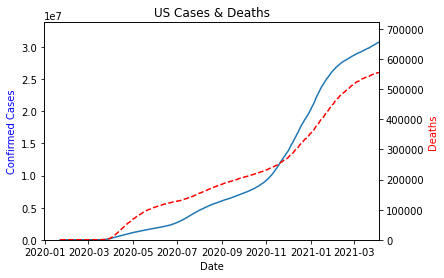

In [46]:
plot_case_with_death('US')

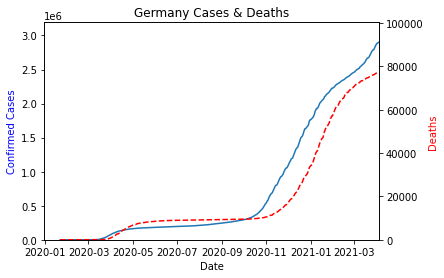

In [52]:
plot_case_with_death('Germany')

In [58]:
# 한국의 누적 확진자 / 사망자 수 시각화
for c in df_case.columns:
  print(c)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Mal

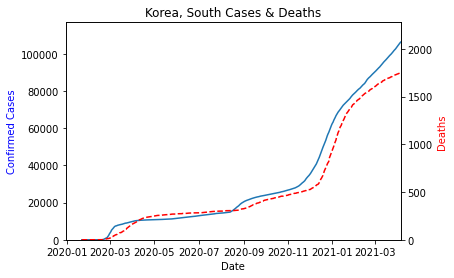

In [55]:
plot_case_with_death('Korea, South')

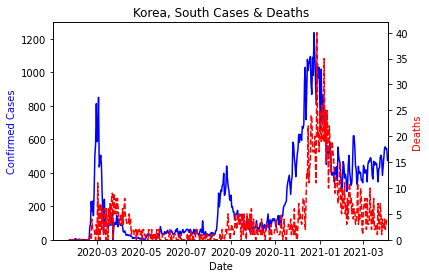

In [60]:
# 한국의 일일 확진자 / 사망자 수 시각화, diff() 함수 활용 (증가량, 미분)
country = 'Korea, South'
plt.plot(df_case.index, df_case[country].diff(), 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.title(country + ' Cases & Deaths')
plt.xlim(right=df_case.index[-1])
plt.xlabel('Date')
plt.ylim(bottom=0)

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death[country].diff(), 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(bottom=0)
plt.show();

### Plotly를 이용하여 데이터 시각화
- Plotly의 Choropleth 데이터 포맷으로 맞추기

In [61]:
import plotly.graph_objects as go

In [62]:
# 아래 데이터 프레임을 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [64]:
df_code.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [63]:
# 이름이 다르게 쓰인 국가의 이름을 먼저 변경한 후 코드로 변경
country_renamer = {
    'Bahamas' : 'Bahamas, The',
    'Congo (Brazzaville)' : 'Congo, Republic of the',
    'Congo (Kinshasa)' : 'Congo, Democratic Republic of the',
    'Czechia' : 'Czech Republic',
    'Eswatini' : 'Swaziland',
    'Gambia' : 'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [65]:
df_case.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [69]:
country_to_code = df_code.set_index('COUNTRY')['CODE']

In [70]:
df_c = df_case.rename(country_renamer, axis=1).copy()
for col in df_c.columns:
  if col not in country_to_code.index:
    df_c.drop(col, axis=1, inplace=True)
df_code = df_c.rename(country_to_code, axis=1)
df_code.head()

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,AZE,BHM,BHR,BGD,BRB,BLR,BEL,BLZ,BEN,BTN,BOL,BIH,BWA,BRA,BRN,BGR,BFA,MMR,BDI,CPV,KHM,CMR,CAN,CAF,TCD,CHL,CHN,COL,COM,COG,...,SRB,SYC,SLE,SGP,SVK,SVN,SLB,SOM,ZAF,SSD,ESP,LKA,SDN,SUR,SWE,CHE,SYR,TWN,TJK,TZA,THA,TLS,TGO,TTO,TUN,TUR,USA,UGA,UKR,ARE,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [71]:
for c in df_code.columns:
  print(c)

AFG
ALB
DZA
AND
AGO
ATG
ARG
ARM
AUS
AUT
AZE
BHM
BHR
BGD
BRB
BLR
BEL
BLZ
BEN
BTN
BOL
BIH
BWA
BRA
BRN
BGR
BFA
MMR
BDI
CPV
KHM
CMR
CAN
CAF
TCD
CHL
CHN
COL
COM
COG
COD
CRI
CIV
HRV
CUB
CYP
CZE
DNK
DJI
DMA
DOM
ECU
EGY
SLV
GNQ
ERI
EST
SWZ
ETH
FJI
FIN
FRA
GAB
GMB
GEO
DEU
GHA
GRC
GRD
GTM
GIN
GNB
GUY
HTI
HND
HUN
ISL
IND
IDN
IRN
IRQ
IRL
ISR
ITA
JAM
JPN
JOR
KAZ
KEN
KOR
KSV
KWT
KGZ
LAO
LVA
LBN
LSO
LBR
LBY
LIE
LTU
LUX
MDG
MWI
MYS
MDV
MLI
MLT
MHL
MRT
MUS
MEX
MDA
MCO
MNG
MNE
MAR
MOZ
NAM
NPL
NLD
NZL
NIC
NER
NGA
MKD
NOR
OMN
PAK
PAN
PNG
PRY
PER
PHL
POL
PRT
QAT
ROU
RUS
RWA
KNA
LCA
VCT
WSM
SMR
STP
SAU
SEN
SRB
SYC
SLE
SGP
SVK
SVN
SLB
SOM
ZAF
SSD
ESP
LKA
SDN
SUR
SWE
CHE
SYR
TWN
TJK
TZA
THA
TLS
TGO
TTO
TUN
TUR
USA
UGA
UKR
ARE
GBR
URY
UZB
VUT
VEN
VNM
WBG
YEM
ZMB
ZWE


In [72]:
 # 공식 레퍼런스 참조 : https://plotly.com/python/choropleth-maps/#world-choropleth-map
def get_choropleth_data(date):

  data = go.Choropleth(
      locations = df_code.columns,
      z = df_code.loc[date],
      text = df_c.columns,
      colorscale = 'Blues',
      autocolorscale=False,
      reversescale=True,
      marker_line_color='darkgray',
      marker_line_width=0.5,
      colorbar_tickprefix = '',
      colorbar_title = 'Confirmed Cases',
  )

  return data

In [73]:
date = df_case.index[-1]
data=get_choropleth_data(date)
fig = go.Figure(data=data)

fig.update_layout(
    title_text='Confirmed Cases in' + str(date),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
  )
fig.show()

### 모델 학습을 위한 데이터 전처리
- FBProphet 학습을 위한 데이터프레임 생성

In [74]:
# 공식 레퍼런스 참조 : https://facebook.github.io/prophet/docs/quick_start.html#python-api
# 한국의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성하시오.

df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds', 'y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
435,2021-04-01,104194
436,2021-04-02,104736
437,2021-04-03,105279
438,2021-04-04,105752


### 학습데이터와 테스트데이터 분리하기

In [75]:
from math import floor

In [76]:
def train_test_split_df(df, test_size):
  div = floor(df.shape[0] * (1 - test_size))
  return df.loc[:div], df.loc[div:]

In [77]:
train_df, test_df = train_test_split_df(df, 0.1)

In [78]:
train_df.shape

(397, 2)

In [79]:
test_df.shape

(44, 2)

### Prophet 모델 학습

In [80]:
from fbprophet import Prophet

In [84]:
model = Prophet(changepoint_range=1.0)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
# 시각화
from fbprophet.plot import add_changepoints_to_plot

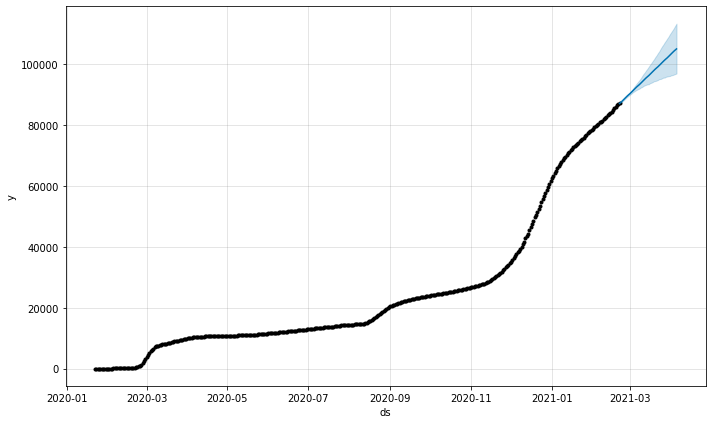

In [85]:
pred = model.predict(test_df)
model.plot(pred);

- 검정색 선은 과거 데이터,
- 파란색 선은 예측 데이터.
- 파란색 선 주위 영역은 신뢰도 95% 구간을 의미.

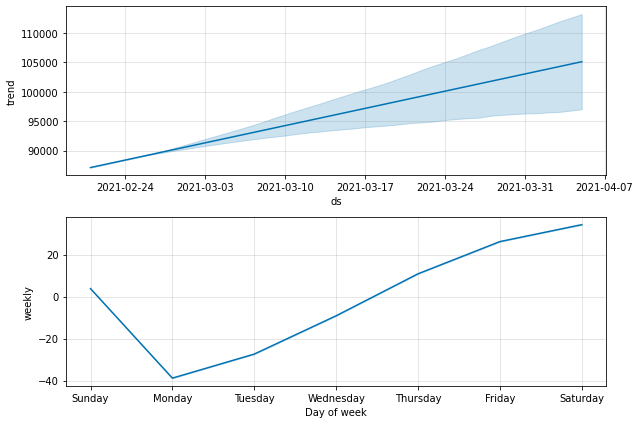

In [86]:
model.plot_components(pred);

- 확진자 형성 경향과 주중 분석 데이터를 보여줌.
- 주말에 사람들이 많이 돌아다녔기에 높은 확진율을 보이는 것이라고 이해됨.

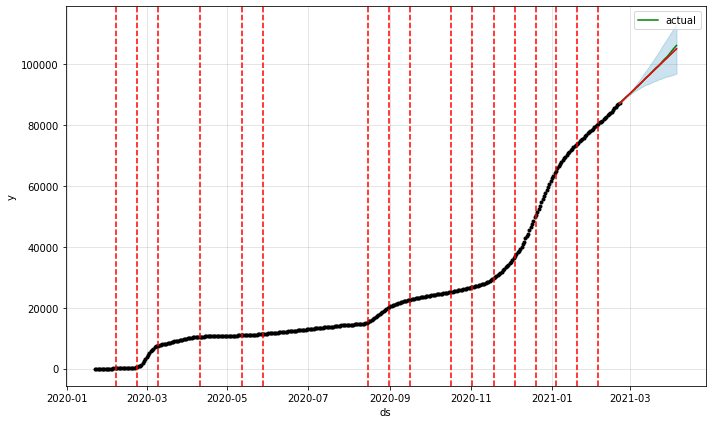

In [87]:
fig = model.plot(pred)
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual')
add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend();

- 실제값(초록 선)과 예상값(빨간 선)의 값이 비슷하다.

### 모델 학습 결과 평가

In [88]:
from sklearn.metrics import r2_score

In [93]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-21,87129.307127,86910.822459,87363.718112,87129.307127,87129.307127,3.831354,3.831354,3.831354,3.831354,3.831354,3.831354,0.0,0.0,0.0,87133.138482
1,2021-02-22,87547.769292,87262.755154,87729.755120,87547.769292,87547.769292,-38.802226,-38.802226,-38.802226,-38.802226,-38.802226,-38.802226,0.0,0.0,0.0,87508.967066
2,2021-02-23,87966.231456,87714.955300,88167.125609,87966.231456,87966.231456,-27.348691,-27.348691,-27.348691,-27.348691,-27.348691,-27.348691,0.0,0.0,0.0,87938.882765
3,2021-02-24,88384.693621,88144.935029,88603.469482,88384.693621,88384.693621,-9.103420,-9.103420,-9.103420,-9.103420,-9.103420,-9.103420,0.0,0.0,0.0,88375.590201
4,2021-02-25,88803.155785,88569.551329,89089.141889,88803.155785,88814.467722,10.891370,10.891370,10.891370,10.891370,10.891370,10.891370,0.0,0.0,0.0,88814.047155


- yhat은 prediction된 값을 의미.

In [92]:
print('R2 Score:', r2_score(test_df['y'], pred['yhat']))

R2 Score: 0.9953227969520745


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


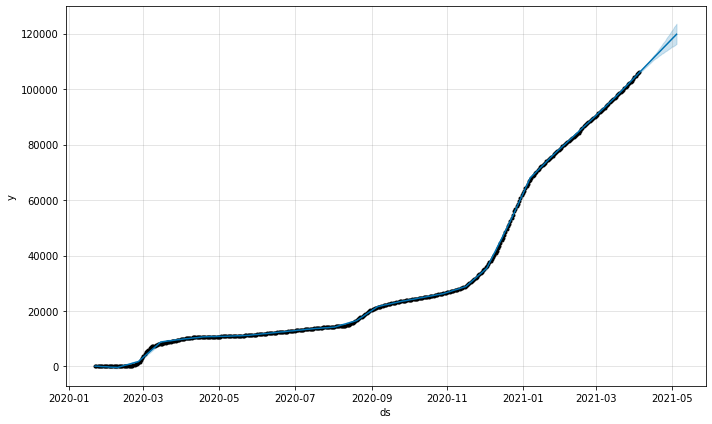

In [94]:
# 프로펫 모델로 미래 30일 데이터 예측
# 전체 df 학습 이후 향후 30일에 대한 데이터 예측

model = Prophet(changepoint_range=1.0)
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

- 미래 30일 데이터를 예측한 결과, 감소세는 나타나지 않고 계속하여 증가하는 모습을 보인다.

# IF-CASE 예측해보기
- 한국 확진자 수 변화의 특별한 이벤트 확인하기

In [96]:
df['ds'][10]

Timestamp('2020-02-01 00:00:00')

In [97]:
# 코로나 확산 초기, 한국의 확진자 수가 급증한 시점 찾기
df.loc[24:33]

,ds,y
24,2020-02-15,28
25,2020-02-16,29
26,2020-02-17,30
27,2020-02-18,31
28,2020-02-19,31
29,2020-02-20,104
30,2020-02-21,204
31,2020-02-22,433
32,2020-02-23,602
33,2020-02-24,833


### 확진자수가 급증한 일이 없었을 경우 한국의 확진자 수 변화 예측

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


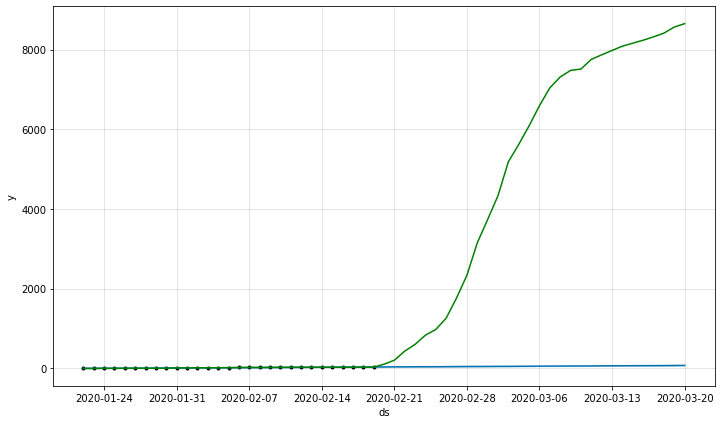

In [100]:
# 확진자 수 급증 이전 데이터를 학습 후 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교
model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:28])
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred)
plt.plot(df.loc[:58]['ds'], df.loc[:58]['y'], 'g-')
plt.show();